## Redeanteile im Bundestag in der Legislatuperiode 2017-2021

Ziel ist eine übersichtliche Darstellung der Redeanteile im Bundestag in der Legislaturperiode von 2017 - 2021.  
Zuerst werden alle Reden in eine Liste geladen welche dann ausgewertet wird. Die 

In [1]:
import requests
import json
import numpy as np
import jsonlines
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Colorcodes der Parteien, entsprchend der Realität

In [3]:
colorcode={'AfD':'#009ee0',
           'BÜNDNIS 90/DIE GRÜNEN':'#46962b',
           'CDU/CSU':'#949494',
           'DIE LINKE':'#800080',
           'FDP':'#ffed00',
           'SPD':'#e3000f', 
          }#'FRAKTIONSLOS': '#808080'}

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [4]:
with open('C:/Users/wesse/Documents/GitHub/bundestagsreden/data/speeches_preprocessed.json', 'r') as fp:
    data = json.load(fp)
    
alleReden = data.copy()

In [5]:
alleReden[120]

{'date': '2017-11-22',
 'discussion_title': 'Tagesordnungspunkt 11 2017-11-22',
 'id': 'ID19300300',
 'name': 'Rüdiger Lucassen',
 'party': 'AfD',
 'period': '19',
 'text': 'Herr Präsident! Sehr geehrte Abgeordnete! Ich werde mich an die vorgegebene Redezeit halten. – Wir sprechen heute über jene Männer und Frauen, die mich über drei Jahrzehnte als Kameraden begleiteten, Männer und Frauen, die als Zeit- und Berufssoldaten einen Eid ablegen, unserem Land treu zu dienen und das Recht und die Freiheit des deutschen Volkes tapfer zu verteidigen. Aber die Grünen und Herr Lindner wollen diesen Eid, wie wir gestern hörten, auf den ganzen Planeten ausdehnen. Die Gefahr für Leib und Leben ist integraler Bestandteil des Soldatenberufs. Wir entsenden Soldaten in einen Einsatz, gerade weil es gefährlich ist und weil nur sie in der Lage und willens sind, diesen Gefahren zu begegnen. Diese Gefahren für unsere Soldaten dürfen wir als Volksvertreter nur akzeptieren, wenn sie in einem angemessenen Verh

In [6]:
input_list = []
wort_haeufigkeiten =[]


for rede in alleReden:
    if len(rede['text_lem'])>0:
    #if rede['name']=='Angela Merkel':
        wort_haeufigkeiten.append(len(rede['text_lem']))
        input_dict = {
            'name'  : rede["name"],
            'party' : rede["party"],
        }
        input_list.append(input_dict)       

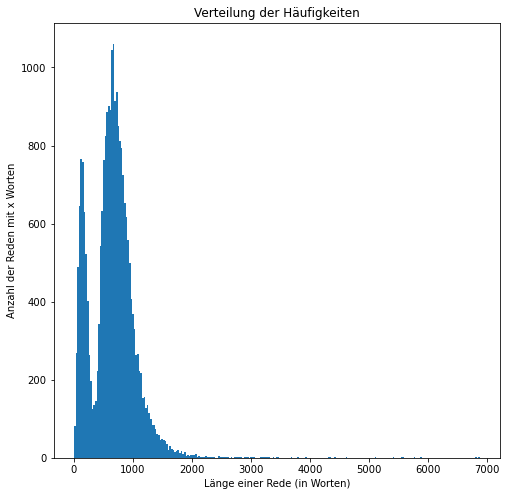

In [7]:
mpl.rcParams["figure.figsize"] = (8,8)

plt.hist(wort_haeufigkeiten, bins ='auto')
plt.title("Verteilung der Häufigkeiten")
plt.xlabel("Länge einer Rede (in Worten)")
plt.ylabel("Anzahl der Reden mit x Worten")

plt.show()


Anfangs werden die Daten bereinigt, um Formatfehler zu beseitigen (Unterschiede in der Groß- und Kleinschreibung).
Anschließend wird ausgezählt, wie viele Reden jeder Redner gehalten hat.

In [8]:
Haeufigkeiten = []
Namen = []

for i in range(0, len(input_list)):
    Namen.append(input_list[i]['name'])
    Namen[i] = Namen[i].replace(u'\xa0', u' ')
    Namen[i] = str.lower(Namen[i])

Nameneinzeln_int = sorted(set(Namen))

for i in range(0, len(Nameneinzeln_int)-1):
    summe = 0
    for j in range(0, len(Namen)):
        if Nameneinzeln_int[i]==Namen[j]:
            summe = summe+1
        else: next
    Haeufigkeiten.append(summe)    


Durch einen Collections Counter lassen sich die 10 Top-Redner schnell identifizieren:

In [9]:
import collections
counter = collections.Counter(Namen).most_common()
counter


for i in range(0,10):
    print(counter[i])



('angela merkel', 368)
('heiko maas', 235)
('jens spahn', 195)
('olaf scholz', 181)
('anja karliczek', 163)
('volker ullrich', 157)
('franziska giffey', 153)
('svenja schulze', 152)
('andreas scheuer', 137)
('hubertus heil', 136)


Es fällt auf, dass die 10 Topredner fasst ausschließlich Ministerposten innehaben( mit Ausnahme von Volker Ullrich). Angela Merkel hält als Bundeskanzlerin mit Abstand die meisten Reden im Bundestag.

Durch eine graphische Darstellung lässt sich die Verteilung der Daten besser nachvollziehen.

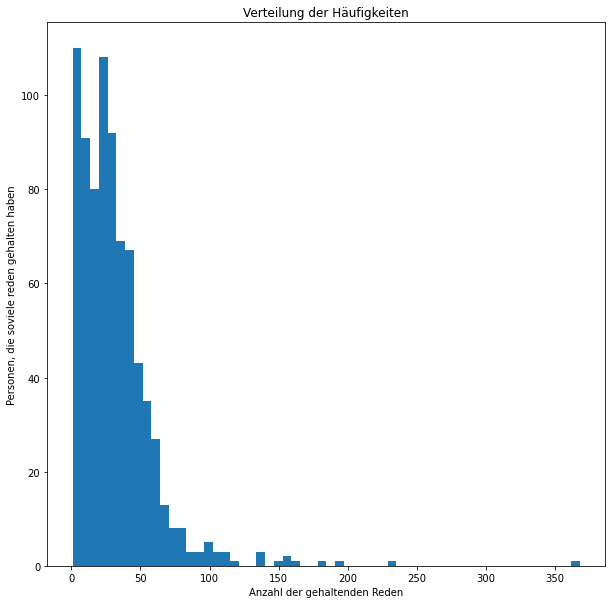

In [10]:
mpl.rcParams["figure.figsize"] = (10,10)

plt.hist(Haeufigkeiten, bins='auto')

plt.title("Verteilung der Häufigkeiten")
plt.xlabel("Anzahl der gehaltenden Reden")
plt.ylabel("Personen, die soviele reden gehalten haben")
plt.show()


In [11]:
def get_haeufigkeiten_für_partei(party):

    temp = []
    
    for rede in input_list:
        if rede['party']==party:
            temp.append(rede)
                
    Namen = []

    for i in range(0, len(temp)):
        Namen.append(temp[i]['name'])
        Namen[i] = Namen[i].replace(u'\xa0', u' ')
        Namen[i] = str.lower(Namen[i])

    Nameneinzeln = sorted(set(Namen))
    
    Haeufigkeiten = []
    for i in range(0, len(Nameneinzeln)-1):
        summe = 0
        for j in range(0, len(Namen)):
            if Nameneinzeln[i]==Namen[j]:
                summe = summe+1
            else: next
        Haeufigkeiten.append(summe)    
    
    return Haeufigkeiten
            

In [12]:
par1 = get_haeufigkeiten_für_partei('AfD')
par2 = get_haeufigkeiten_für_partei('BÜNDNIS 90/DIE GRÜNEN')
par3 = get_haeufigkeiten_für_partei('CDU/CSU')
par4 = get_haeufigkeiten_für_partei('DIE LINKE')
par5 = get_haeufigkeiten_für_partei('FDP')
par6 = get_haeufigkeiten_für_partei('SPD')

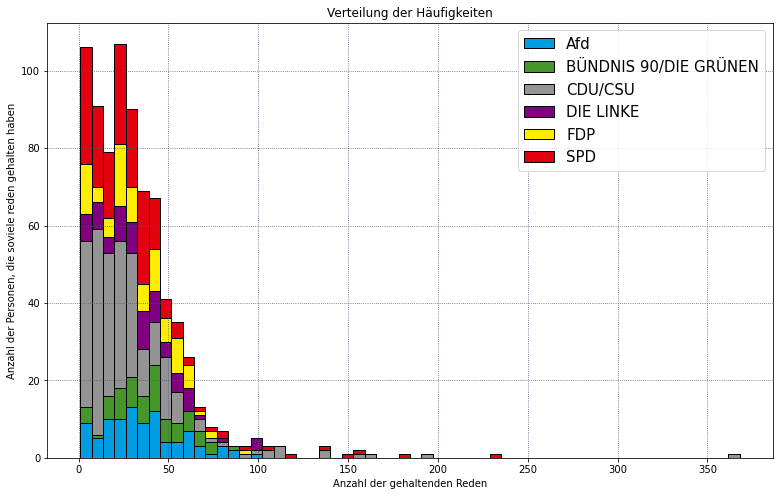

In [13]:
mpl.rcParams["figure.figsize"] = (13,8)
fig = plt.figure()

plt.hist([par1,par2,par3,par4,par5,par6], bins='auto', stacked=True, 
         color =colorcode.values(), edgecolor='black', label=['Afd','BÜNDNIS 90/DIE GRÜNEN','CDU/CSU','DIE LINKE','FDP','SPD'])
plt.grid(b=True, which='major', color='#445577', linestyle=':')
plt.title("Verteilung der Häufigkeiten")
plt.xlabel("Anzahl der gehaltenden Reden")
plt.ylabel("Anzahl der Personen, die soviele reden gehalten haben")
plt.legend(prop={'size': 15})
plt.show()

from pathlib import Path
fn = Path('~/Documents/parla_hist.svg').expanduser()
fig.savefig(fn, bbox_inches='tight', pad_inches=0)

Der Großteil der Redner hat nicht öfter als 50x mal im Bundestag eine Rede gehalten. Diese Vermutung überprfüen wir noch einmal:
Es zeigt sich, dass 717 von 765 Rednern nicht mehr als 50 Reden gehalten haben.
Knapp über die Hälfte der Redner hat 19 oder weniger Reden gehalten.

In [14]:
grenzwert = 50
redner_unter_grenzwert = 0
for i in range(0, len(Nameneinzeln)-1):
    if Haeufigkeiten[i] <= grenzwert:
        redner_unter_grenzwert=redner_unter_grenzwert+1
    else: 
        next

print("Redner insgesamt: " + 
      str(len(Nameneinzeln)) + "\n" + "Redner, welche weniger als " + 
      str(grenzwert) + " Reden gehalten haben: " + 
      str(redner_unter_grenzwert))

NameError: name 'Nameneinzeln' is not defined

Folgende Auswertungen analysieren die Anzahl der Reden auf Parteilicher Ebene:

In [15]:
Haeufigkeitenparty = []
Party = []

for i in range(0, len(input_list)):
    Party.append(input_list[i]['party'])
    Party[i] = Party[i].replace(u'\xa0', u' ')
    Party[i] = str.upper(Party[i])

Partyeinzeln = sorted(set(Party))

Haeufigkeitenparty = []

for i in range(0, len(Partyeinzeln)):
    summe = 0
    for j in range(0, len(Party)):
        if Partyeinzeln[i]==Party[j]:
            summe = summe+1
        else: next
    Haeufigkeitenparty.append(summe)

Die Häufigkeiten der gehaltenen Reden der Parteien werden nun in einem Plot dargestellt.

In [16]:
colorcode1={'AfD':'#009ee0',
           'Bremen':'#000000',
           'BÜNDNIS 90/DIE GRÜNEN':'#46962b',
           'CDU/CSU':'#000000',
           'DIE LINKE':'#800080',
           'FDP':'#ffed00',
           'SPD':'#e3000f', 
           'FRAKTIONSLOS': '#808080'}

No handles with labels found to put in legend.


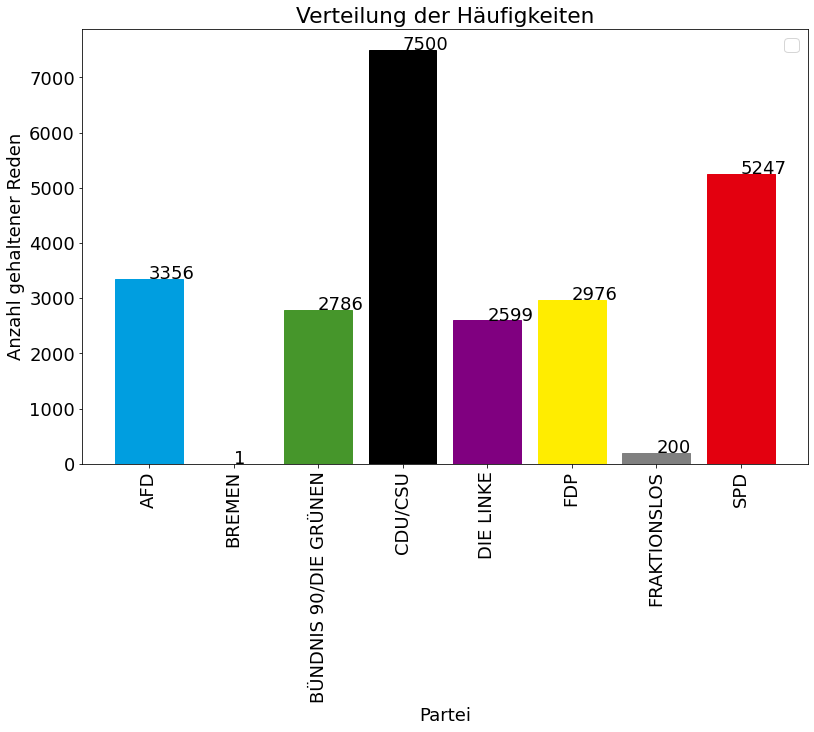

In [17]:

plt.rc('font', size=18)
bar = plt.bar(Partyeinzeln, Haeufigkeitenparty)
plt.title("Verteilung der Häufigkeiten")
plt.xticks(ticks=range(len(Partyeinzeln)), labels=Partyeinzeln, rotation=90)
bar[0].set_color(colorcode1['AfD'])
bar[1].set_color(colorcode1['Bremen'])
bar[2].set_color(colorcode1['BÜNDNIS 90/DIE GRÜNEN'])
bar[3].set_color(colorcode1['CDU/CSU'])
bar[4].set_color(colorcode1['DIE LINKE'])
bar[5].set_color(colorcode1['FDP'])
bar[6].set_color(colorcode1['FRAKTIONSLOS'])
bar[7].set_color(colorcode1['SPD'])
plt.xlabel("Partei")
plt.ylabel("Anzahl gehaltener Reden")

for i in range(0, len(Partyeinzeln)):
    plt.text(i, Haeufigkeitenparty[i],
             str(Haeufigkeitenparty[i]))
    
plt.legend()
plt.show()

Es ist deutlich zu sehen, dass die CDU/CSU den Löwenanteil der Reden hält. 
An zweiter Stelle folgt mit knapp 1700 Reden weniger die SPD. An dritter Stelle die AfD mit 2378 Stellen.

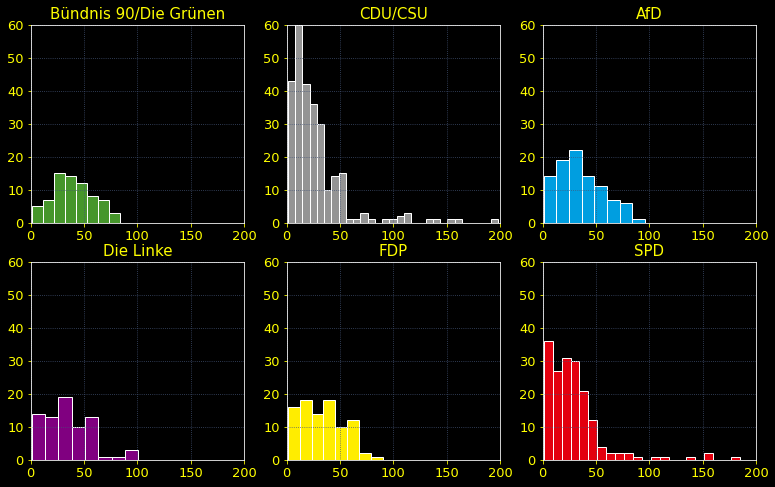

In [18]:
        
def haeufigkeiten_nach_partei(partei):
    
    #Initilaisieren der Benötigten Listen
    Haeufigkeiten = []
    Namen = []
    input_gefiltert = []
    
    #Filtern der Reden, sodass nur die Reden einer Partei in input_gefiltert auftauchen
    for rede in alleReden:
        if str.lower(rede['party'])==str.lower(partei):
            input_gefiltert.append(rede)
    
    #Herausschreiben der Redner, um im folgenden Schritt die Anzahl der Reden zu zählen
    for input_gef in input_gefiltert:
        Name_trial = input_gef['name']
        Name_trial = Name_trial.replace(u'\xa0', u' ')
        Name_trial = Name_trial.lower()
        Namen.append(Name_trial)

    Namen_einzeln = sorted(set(Namen))

    #Zählen der gehaltenen Reden pro Person
    for Name in Namen_einzeln:
            summe = 0
            for j in range(0, len(Namen)):
                if Name == Namen[j]:
                    summe += 1
            Haeufigkeiten.append(summe) 
    
    return Haeufigkeiten

def plot_haeufigkeiten(Liste_der_Parteien):
    #fig.set_alpha(0.6)
    plt.rc('font', size=13)
    mpl.rcParams["figure.figsize"] = (13,8)
    mpl.rcParams['figure.dpi'] = 72
    
    COLOR = 'yellow'
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['axes.edgecolor'] = 'white'
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    #Initialisieren der Plots
    figure, axis = plt.subplots(2, 3)
    figure.set_facecolor('black')
    figure.set_alpha(0.01)
    
    axis[0, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[0]), bins='auto', color=colorcode['BÜNDNIS 90/DIE GRÜNEN'], edgecolor='white')
    axis[0, 0].set_title(Liste_der_Parteien[0], fontsize = 15)
    axis[0, 0].set_xlim(left=0, right=200)
    axis[0, 0].set_ylim(bottom=0, top=60)
    axis[0, 0].set_facecolor("black")
    axis[0, 0].grid(b=True, which='major', color='#445577', linestyle=':')
    
    axis[0, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[1]), bins='auto', color=colorcode['CDU/CSU'], edgecolor='white')
    axis[0, 1].set_title(Liste_der_Parteien[1], fontsize = 15)
    axis[0, 1].set_xlim(left=0, right=200)
    axis[0, 1].set_ylim(bottom=0, top=60)
    axis[0, 1].set_facecolor("black")
    axis[0, 1].grid(b=True, which='major', color='#445577', linestyle=':')
    
    #axis[0, 2].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[2]), bins = 75)
    #axis[0, 2].set_title(Liste_der_Parteien[2], fontsize = 25)
    
    axis[0, 2].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[3]), bins='auto', color=colorcode['AfD'], edgecolor='white')
    axis[0, 2].set_title(Liste_der_Parteien[3], fontsize = 15)
    axis[0, 2].set_xlim(left=0, right=200)
    axis[0, 2].set_ylim(bottom=0, top=60)
    axis[0, 2].set_facecolor("black")
    axis[0, 2].grid(b=True, which='major', color='#445577', linestyle=':')
    
    axis[1, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[4]), bins='auto', color=colorcode['DIE LINKE'], edgecolor='white')
    axis[1, 0].set_title(Liste_der_Parteien[4], fontsize = 15)
    axis[1, 0].set_xlim(left=0, right=200)
    axis[1, 0].set_ylim(bottom=0, top=60)
    axis[1, 0].set_facecolor("black")
    axis[1, 0].grid(b=True, which='major', color='#445577', linestyle=':')
    
    axis[1, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[5]), bins='auto', color=colorcode['FDP'], edgecolor='white')
    axis[1, 1].set_title(Liste_der_Parteien[5], fontsize = 15)
    axis[1, 1].set_xlim(left=0, right=200)
    axis[1, 1].set_ylim(bottom=0, top=60)
    axis[1, 1].set_facecolor("black")
    axis[1, 1].grid(b=True, which='major', color='#445577', linestyle=':')
    
    axis[1, 2].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[6]), bins='auto', color=colorcode['SPD'], edgecolor='white')
    axis[1, 2].set_title(Liste_der_Parteien[6], fontsize = 15)
    axis[1, 2].set_xlim(left=0, right=200)
    axis[1, 2].set_ylim(bottom=0, top=60)
    axis[1, 2].set_facecolor("black")
    axis[1, 2].grid(b=True, which='major', color='#445577', linestyle=':')
    #axis[2, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[7]), bins = 75)
    #axis[2, 1].set_title(Liste_der_Parteien[7], fontsize = 25)


    # Combine all the operations and display
    plt.show()
    
    from pathlib import Path
    fn = Path('~/Documents/party_hist.svg').expanduser()
    figure.savefig(fn, bbox_inches='tight', pad_inches=0)
    
    

Liste_der_Parteien = ["Bündnis 90/Die Grünen","CDU/CSU","Bremen","AfD","Die Linke","FDP","SPD","fraktionslos"]

plot_haeufigkeiten(Liste_der_Parteien)



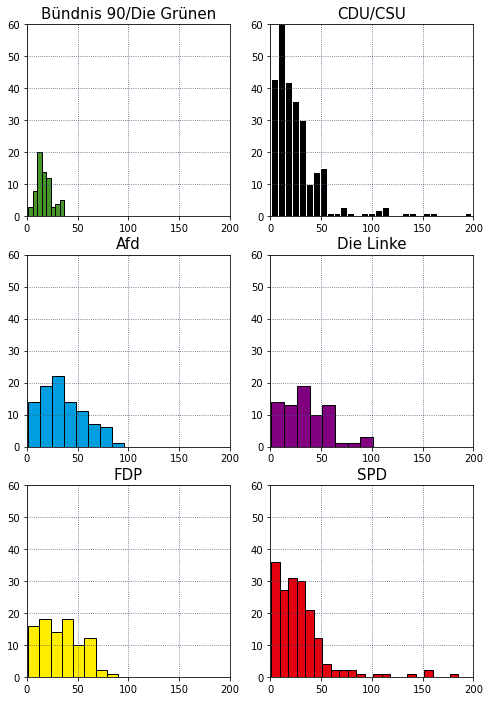

In [43]:
        
def haeufigkeiten_nach_partei(partei):
    
    #Initilaisieren der Benötigten Listen
    Haeufigkeiten = []
    Namen = []
    input_gefiltert = []
    
    #Filtern der Reden, sodass nur die Reden einer Partei in input_gefiltert auftauchen
    for rede in alleReden:
        if str.lower(rede['party'])==str.lower(partei):
            input_gefiltert.append(rede)
    
    #Herausschreiben der Redner, um im folgenden Schritt die Anzahl der Reden zu zählen
    for input_gef in input_gefiltert:
        Name_trial = input_gef['name']
        Name_trial = Name_trial.replace(u'\xa0', u' ')
        Name_trial = Name_trial.lower()
        Namen.append(Name_trial)

    Namen_einzeln = sorted(set(Namen))

    #Zählen der gehaltenen Reden pro Person
    for Name in Namen_einzeln:
            summe = 0
            for j in range(0, len(Namen)):
                if Name == Namen[j]:
                    summe += 1
            Haeufigkeiten.append(summe) 
    
    return Haeufigkeiten

def plot_haeufigkeiten(Liste_der_Parteien):
    
    mpl.rcParams["figure.figsize"] = (8,12)
    mpl.rcParams['figure.dpi'] = 72
    
    #Initialisieren der Plots
    figure, axis = plt.subplots(3, 2)
    
    axis[0, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[0]), bins='auto', color=colorcode['BÜNDNIS 90/DIE GRÜNEN'], edgecolor='black')
    axis[0, 0].set_title(Liste_der_Parteien[0], fontsize = 15)
    axis[0, 0].set_xlim(left=0, right=200)
    axis[0, 0].set_ylim(bottom=0, top=60)
    axis[0, 0].grid(b=True, which='major', color='#445577', linestyle=':')
    
    axis[0, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[1]), bins='auto', color=colorcode['CDU/CSU'], edgecolor='white')
    axis[0, 1].set_title(Liste_der_Parteien[1], fontsize = 15)
    axis[0, 1].set_xlim(left=0, right=200)
    axis[0, 1].set_ylim(bottom=0, top=60)
    axis[0, 1].grid(b=True, which='major', color='#445577', linestyle=':')
    
    #axis[0, 2].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[2]), bins = 75)
    #axis[0, 2].set_title(Liste_der_Parteien[2], fontsize = 25)
    
    axis[1, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[3]), bins='auto', color=colorcode['AfD'], edgecolor='black')
    axis[1, 0].set_title(Liste_der_Parteien[3], fontsize = 15)
    axis[1, 0].set_xlim(left=0, right=200)
    axis[1, 0].set_ylim(bottom=0, top=60)
    axis[1, 0].grid(b=True, which='major', color='#445577', linestyle=':')
    
    axis[1, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[4]), bins='auto', color=colorcode['DIE LINKE'], edgecolor='black')
    axis[1, 1].set_title(Liste_der_Parteien[4], fontsize = 15)
    axis[1, 1].set_xlim(left=0, right=200)
    axis[1, 1].set_ylim(bottom=0, top=60)
    axis[1, 1].grid(b=True, which='major', color='#445577', linestyle=':')
    
    axis[2, 0].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[5]), bins='auto', color=colorcode['FDP'], edgecolor='black')
    axis[2, 0].set_title(Liste_der_Parteien[5], fontsize = 15)
    axis[2, 0].set_xlim(left=0, right=200)
    axis[2, 0].set_ylim(bottom=0, top=60)
    axis[2, 0].grid(b=True, which='major', color='#445577', linestyle=':')
    
    axis[2, 1].grid(b=True, which='major', color='#445577', linestyle=':')
    axis[2, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[6]), bins='auto', color=colorcode['SPD'], edgecolor='black')
    axis[2, 1].set_title(Liste_der_Parteien[6], fontsize = 15)
    axis[2, 1].set_xlim(left=0, right=200)
    axis[2, 1].set_ylim(bottom=0, top=60)
    
    
    #axis[2, 1].hist(haeufigkeiten_nach_partei(Liste_der_Parteien[7]), bins = 75)
    #axis[2, 1].set_title(Liste_der_Parteien[7], fontsize = 25)

    
    # Combine all the operations and display
    plt.show()
    
    from pathlib import Path
    fn = Path('~/Documents/party_hist_90deg.svg').expanduser()
    figure.savefig(fn, bbox_inches='tight', pad_inches=0)
    
    

Liste_der_Parteien = ["Bündnis 90/Die Grünen","CDU/CSU","Bremen","Afd","Die Linke","FDP","SPD","fraktionslos"]

plot_haeufigkeiten(Liste_der_Parteien)

